# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 580


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}?q={city}&appid={weather_api_key}&units=metric"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date

        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | punta arenas
Processing Record 2 of Set 1 | kroya
Processing Record 3 of Set 1 | saldanha
Processing Record 4 of Set 1 | talnakh
Processing Record 5 of Set 1 | ribeira grande
Processing Record 6 of Set 1 | college
Processing Record 7 of Set 1 | ust-nera
Processing Record 8 of Set 1 | rafsanjan
Processing Record 9 of Set 1 | susuman
Processing Record 10 of Set 1 | avarua
Processing Record 11 of Set 1 | gold camp
Processing Record 12 of Set 1 | bredasdorp
Processing Record 13 of Set 1 | taiohae
City not found. Skipping...
Processing Record 14 of Set 1 | sonsorol village
City not found. Skipping...
Processing Record 15 of Set 1 | wismar
Processing Record 16 of Set 1 | sarangani
Processing Record 17 of Set 1 | bilibino
Processing Record 18 of Set 1 | omutinskiy
Processing Record 19 of Set 1 | banda aceh
Processing Record 20 of Set 1 | kolonia town
Processing Record 21 of Set 1 | akrehamn
Processing R

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          553
Lat           553
Lng           553
Max Temp      553
Humidity      553
Cloudiness    553
Wind Speed    553
Country       553
Date          553
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,punta arenas,-53.1500,-70.9167,13.06,76,100,5.66,CL,1736625201
1,kroya,-7.6331,109.2461,26.91,89,100,1.26,ID,1736625398
2,saldanha,-33.0117,17.9442,20.03,86,15,5.20,ZA,1736625400
3,talnakh,69.4865,88.3972,-27.06,88,95,3.17,RU,1736625401
4,ribeira grande,38.5167,-28.7000,20.22,83,40,15.65,PT,1736625402


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,punta arenas,-53.1500,-70.9167,13.06,76,100,5.66,CL,1736625201
1,kroya,-7.6331,109.2461,26.91,89,100,1.26,ID,1736625398
2,saldanha,-33.0117,17.9442,20.03,86,15,5.20,ZA,1736625400
3,talnakh,69.4865,88.3972,-27.06,88,95,3.17,RU,1736625401
4,ribeira grande,38.5167,-28.7000,20.22,83,40,15.65,PT,1736625402


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

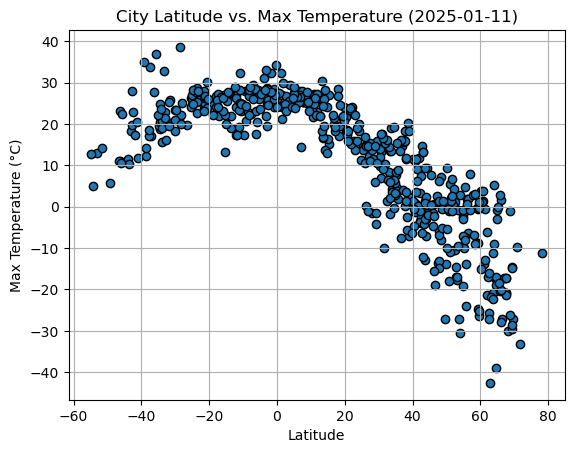

In [10]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (2025-01-11)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (°C)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

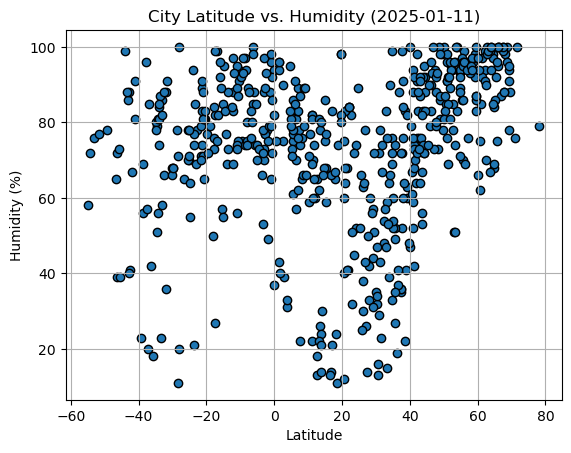

In [11]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (2025-01-11)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

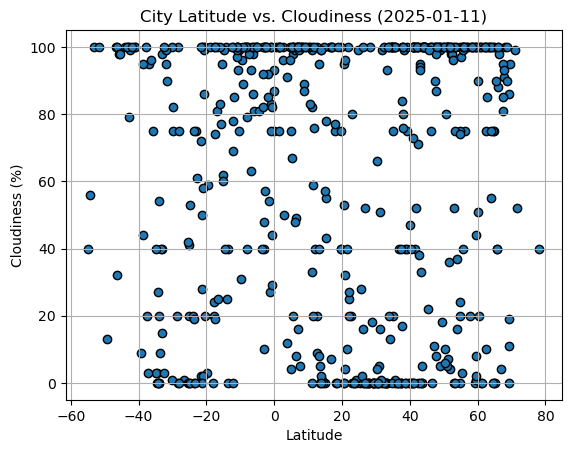

In [12]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (2025-01-11)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

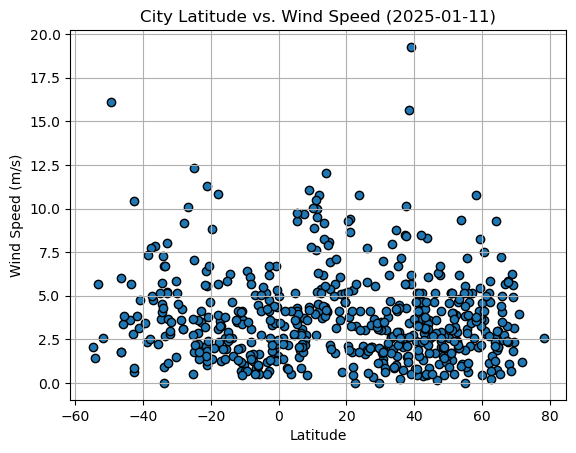

In [13]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (2025-01-11)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [ ]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, xlabel, ylabel, title, hemisphere):
    # Perform linear regression
    slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)

    # Create regression line values
    regression_line = slope * x_values + intercept

    # Plot scatter plot
    plt.scatter(x_values, y_values, edgecolors="black")

    # Plot regression line
    plt.plot(x_values, regression_line, color="red")

    # Dynamically determine annotation position
    x_pos = np.mean(x_values)
    y_offset = 0.1 * (max(y_values) - min(y_values))
    if slope > 0:
        y_pos = min(y_values) + y_offset
    else:
        y_pos = max(y_values) - y_offset

    # Annotate the regression line equation and R²
    plt.text(x_pos, y_pos, f"y = {slope:.2f}x + {intercept:.2f}\nR² = {rvalue**2:.2f}",
             fontsize=12, color="red", bbox=dict(facecolor='white', alpha=0.5))

    # Set title and labels
    plt.title(f"{title} ({hemisphere} Hemisphere)")
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

    # Show plot
    plt.show()

In [15]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,talnakh,69.4865,88.3972,-27.06,88,95,3.17,RU,1736625401
4,ribeira grande,38.5167,-28.7000,20.22,83,40,15.65,PT,1736625402
5,college,64.8569,-147.8028,-3.03,68,75,2.06,US,1736625404
6,ust-nera,64.5667,143.2000,-39.01,98,75,0.72,RU,1736625405
7,rafsanjan,30.4067,55.9939,9.97,32,66,1.89,IR,1736625406


In [16]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,punta arenas,-53.1500,-70.9167,13.06,76,100,5.66,CL,1736625201
1,kroya,-7.6331,109.2461,26.91,89,100,1.26,ID,1736625398
2,saldanha,-33.0117,17.9442,20.03,86,15,5.20,ZA,1736625400
9,avarua,-21.2078,-159.7750,27.03,89,100,11.32,CK,1736625409
11,bredasdorp,-34.5322,20.0403,18.87,79,3,4.52,ZA,1736625412


###  Temperature vs. Latitude Linear Regression Plot

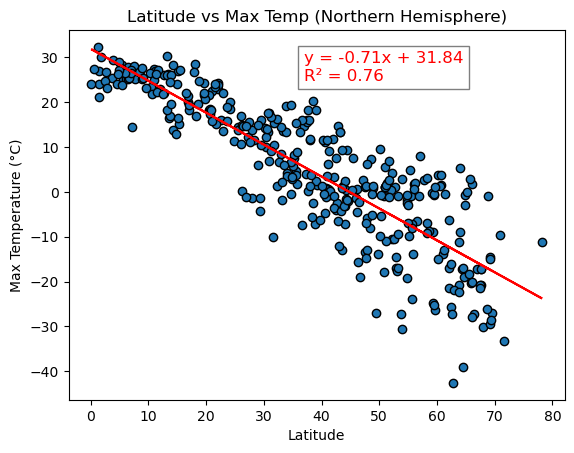

In [47]:
# Linear regression on Northern Hemisphere
plot_linear_regression(
    northern_hemi_df["Lat"],
    northern_hemi_df["Max Temp"],
    xlabel="Latitude",
    ylabel="Max Temperature (°C)",
    title="Latitude vs Max Temp",
    hemisphere="Northern"
)

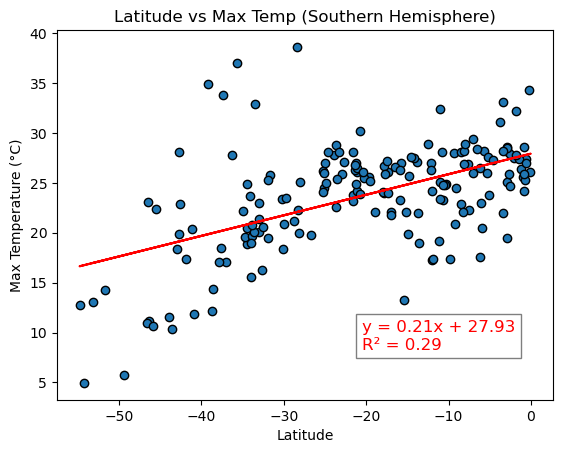

In [48]:
# Linear regression on Southern Hemisphere
plot_linear_regression(
    southern_hemi_df["Lat"],
    southern_hemi_df["Max Temp"],
    xlabel="Latitude",
    ylabel="Max Temperature (°C)",
    title="Latitude vs Max Temp",
    hemisphere="Southern"
)

**Discussion about the linear relationship:** 

Northern Hemisphere:
* The plot shows a strong negative correlation between latitude and maximum temperature, with an R² value of 0.76, indicating that 76% of the variability in temperature can be explained by the latitude.
* As latitude increases (moving away from the equator towards the poles), the maximum temperature decreases. This trend aligns with expectations, as regions farther from the equator generally receive less direct sunlight and have cooler climates.

Southern Hemisphere:
* The plot shows a weak positive correlation between latitude and maximum temperature, with an R² value of 0.29, indicating that only 29% of the variability in temperature is explained by latitude.
* As latitude decreases (moving away from the equator towards the South Pole), the maximum temperature decreases slightly. However, the weaker correlation suggests that other factor may influence temperature in the Southern Hemisphere more than latitude alone.

### Humidity vs. Latitude Linear Regression Plot

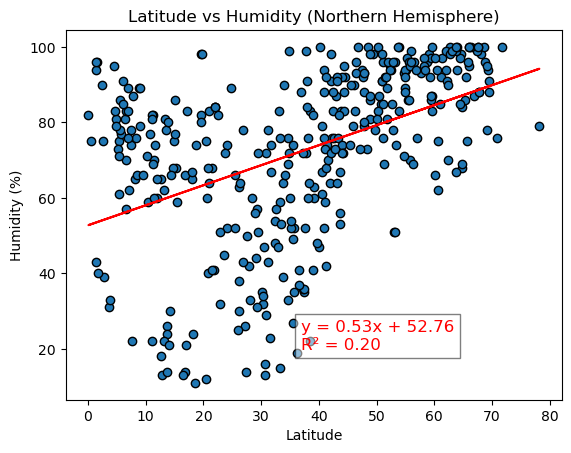

In [49]:
# Northern Hemisphere
plot_linear_regression(
    northern_hemi_df["Lat"],
    northern_hemi_df["Humidity"],
    xlabel="Latitude",
    ylabel="Humidity (%)",
    title="Latitude vs Humidity",
    hemisphere="Northern"
)

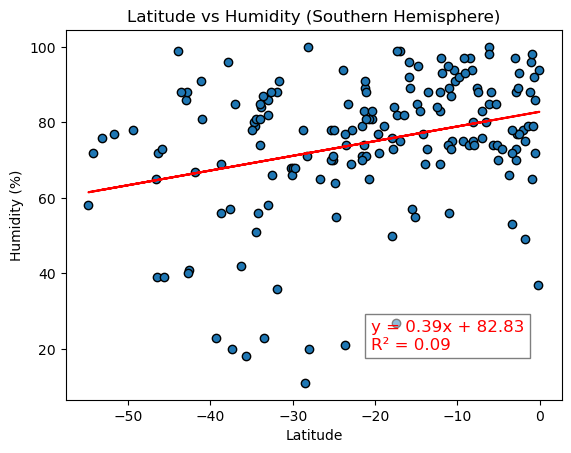

In [50]:
# Southern Hemisphere
plot_linear_regression(
    southern_hemi_df["Lat"],
    southern_hemi_df["Humidity"],
    xlabel="Latitude",
    ylabel="Humidity (%)",
    title="Latitude vs Humidity",
    hemisphere="Southern"
)

**Discussion about the linear relationship:**

Northern Hemisphere:
* The plot shows a weak positive correlation between latitude and humidity, with an R² value of 0.20, indicating that only 20% of the variability in humidity can be explained by latitude.
* The weak correlation suggests that latitude has limited influence on humidity levels in the Northern Hemisphere. Humidity is likely affected by other factors.

Southern Hemisphere:
* The plot also shows a very weak positive correlation between latitude and humidity, with an R² value of 0.09, indicating that only 9% of the variability in humidity is explained by latitude.
* The weak relationship highlights that other environmental and geographical factors may play a significant role in determining humidity levels in the Southern Hemisphere.

### Cloudiness vs. Latitude Linear Regression Plot

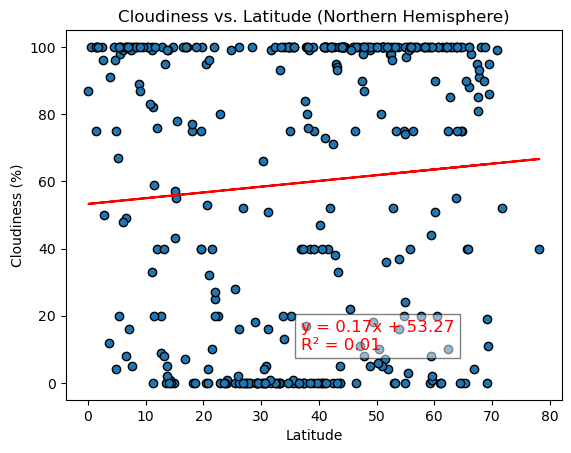

In [51]:
# Northern Hemisphere
plot_linear_regression(
    northern_hemi_df["Lat"],
    northern_hemi_df["Cloudiness"],
    xlabel="Latitude",
    ylabel="Cloudiness (%)",
    title="Cloudiness vs. Latitude",
    hemisphere="Northern"
)

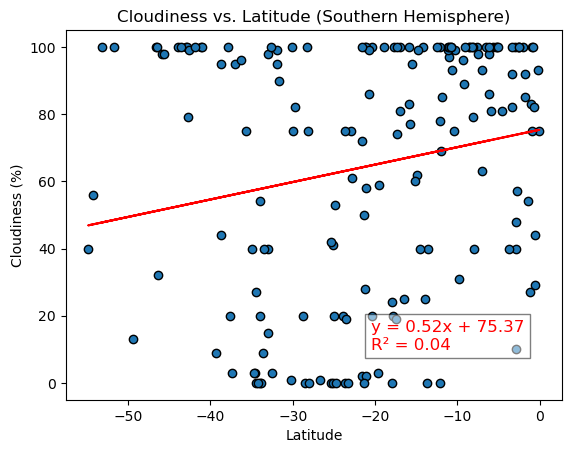

In [52]:
# Southern Hemisphere
plot_linear_regression(
    southern_hemi_df["Lat"],
    southern_hemi_df["Cloudiness"],
    xlabel="Latitude",
    ylabel="Cloudiness (%)",
    title="Cloudiness vs. Latitude",
    hemisphere="Southern"
)

**Discussion about the linear relationship:** 

Northern Hemisphere:
* The plot shows no significant correlation between latitude and cloudiness, as indicated by the R² value of 0.01, meaning only 1% of the variability in cloudiness can be explained by latitude.
* The data points are highly scattered across the y-axis, suggesting that cloudiness is influenced by factors unrelated to latitude.

Southern Hemisphere:
* The plot also shows no significant correlation between latitude and cloudiness, with an R² value of 0.04, meaning only 4% of the variability in cloudiness is explained by latitude.
* Similar to the Northern Hemisphere, the data points are scattered with no discernible pattern, indicating that latitude alone does not determine cloudiness levels.

### Wind Speed vs. Latitude Linear Regression Plot

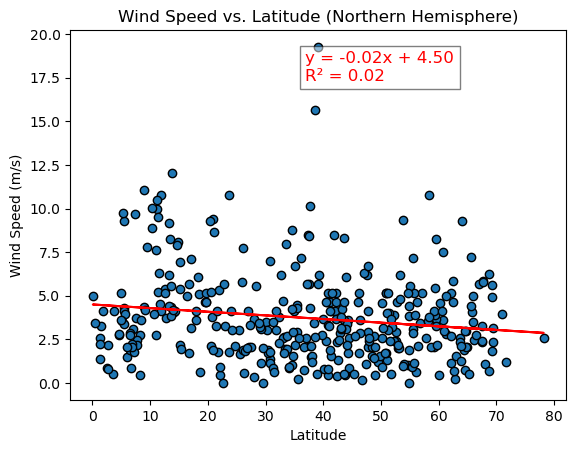

In [53]:
# Northern Hemisphere
plot_linear_regression(
    northern_hemi_df["Lat"],
    northern_hemi_df["Wind Speed"],
    xlabel="Latitude",
    ylabel="Wind Speed (m/s)",
    title="Wind Speed vs. Latitude",
    hemisphere="Northern"
)

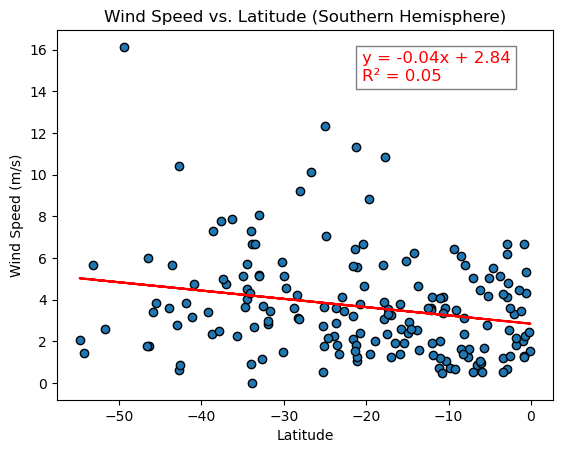

In [54]:
# Southern Hemisphere
plot_linear_regression(
    southern_hemi_df["Lat"],
    southern_hemi_df["Wind Speed"],
    xlabel="Latitude",
    ylabel="Wind Speed (m/s)",
    title="Wind Speed vs. Latitude",
    hemisphere="Southern"
)

**Discussion about the linear relationship:** 

Northern Hemisphere:
* The plot shows no significant correlation between latitude and wind speed, as indicated by the R² value of 0.02, meaning only 2% of the variability in wind speed can be explained by latitude.
* The data points are widely scattered, and the regression line is almost flat, indicating that latitude has little to no effect on wind speed in the Northern Hemisphere.

Southern Hemisphere:
* The plot shows a very weak negative correlation between latitude and wind speed, with an R² value of 0.05, meaning only 5% of the variability in wind speed is explained by latitude.
* While there is a slight downward trend in the regression line, the low R² value suggests that other factors may play a more significant role in determining wind speed.